# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [112]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [64]:
# Load Data 
org = pd.read_csv("assignment2_data.csv")
data = org.copy()

data.head()

# train - test 데이터는 분리 안할게요~

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               5872 non-null   int64  
 1   Kilometers_Driven  5872 non-null   int64  
 2   Fuel_Type          5872 non-null   object 
 3   Transmission       5872 non-null   object 
 4   Owner_Type         5872 non-null   object 
 5   Mileage            5872 non-null   float64
 6   Engine             5872 non-null   float64
 7   Power              5872 non-null   float64
 8   Seats              5872 non-null   float64
 9   Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 504.6+ KB


# 데이터 전처리

## 필요없는 특징 제거

In [66]:
data.drop(['Unnamed: 0','Name','Location','New_Price'],axis=1,inplace=True)

인덱스와 이름, 지역과 같이 연관성이 낮은 핏쳐는 제거하였고  
NEW PRICE와 같이 결측값이 많은 것에 대해서는 제거하였다.

## 결측치 제거

In [67]:
data=data.dropna()
data

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


## 단위수 제거하기

In [68]:
data['Mileage']= data['Mileage'].apply(lambda x : float(str(x).split(' ')[0]))
data['Engine']= data['Engine'].apply(lambda x : float(str(x).split(' ')[0]))
data['Power']= data['Power'].apply(lambda x : (str(x).split(' ')[0]))

In [69]:
sum(data['Power']=='null') # 애초에 null 값으로 저장되어있는 데이터가 존재함

103

In [80]:
data.drop(data['Power'][data['Power']=='null'].index,inplace=True)

In [81]:
sum(data['Power']=='null') # 애초에 null 값으로 저장되어있는 데이터가 존재함

0

In [83]:
data['Power']= data['Power'].apply(lambda x : float(x))

## 원핫인코딩

In [87]:
data = pd.get_dummies(data)
data

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,26.60,998.0,58.16,5.0,1.75,1,0,0,0,0,1,1,0,0,0
1,2015,41000,19.67,1582.0,126.20,5.0,12.50,0,1,0,0,0,1,1,0,0,0
2,2011,46000,18.20,1199.0,88.70,5.0,4.50,0,0,0,1,0,1,1,0,0,0
3,2012,87000,20.77,1248.0,88.76,7.0,6.00,0,1,0,0,0,1,1,0,0,0
4,2013,40670,15.20,1968.0,140.80,5.0,17.74,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,2014,27365,28.40,1248.0,74.00,5.0,4.75,0,1,0,0,0,1,1,0,0,0
6015,2015,100000,24.40,1120.0,71.00,5.0,4.00,0,1,0,0,0,1,1,0,0,0
6016,2012,55000,14.00,2498.0,112.00,8.0,2.90,0,1,0,0,0,1,0,0,1,0
6017,2013,46000,18.90,998.0,67.10,5.0,2.65,0,0,0,1,0,1,1,0,0,0


## 타겟분포 확인

In [88]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
count,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000
mean,2013.477691,5.831700e+04,18.277839,1625.745572,113.276894,5.283719,9.603919,0.009366,0.536785,0.001703,0.452146,0.289850,0.710150,0.824080,0.001192,0.157527,0.017200
std,3.164568,9.216941e+04,4.365657,601.641783,53.881892,0.805081,11.249453,0.096334,0.498688,0.041236,0.497747,0.453731,0.453731,0.380784,0.034509,0.364328,0.130028
min,1998.000000,1.710000e+02,0.000000,624.000000,34.200000,2.000000,0.440000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,3.342250e+04,15.260000,1198.000000,75.000000,5.000000,3.517500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2014.000000,5.260900e+04,18.200000,1495.500000,97.700000,5.000000,5.750000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2016.000000,7.240275e+04,21.100000,1991.000000,138.100000,5.000000,10.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,160.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Density'>

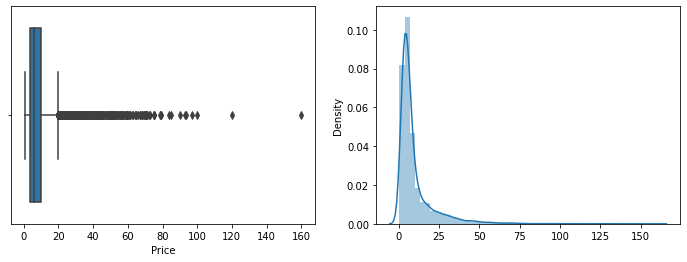

In [89]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(data["Price"], ax=ax1)
sns.distplot(data[["Price"]],ax=ax2)

skewed 되있는 것같아서 로그를 씌워주었다.

<AxesSubplot:ylabel='Density'>

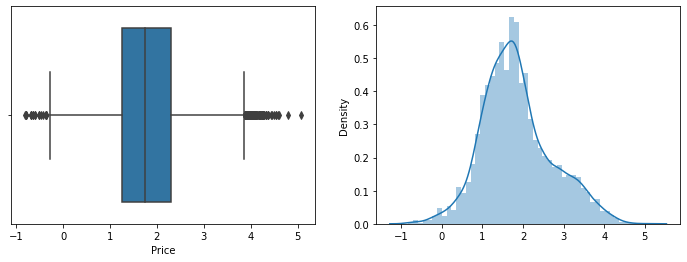

In [93]:
data['Price']= data['Price'].apply(lambda x : np.log(x))

figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12,4)

sns.boxplot(data["Price"], ax=ax1)
sns.distplot(data[["Price"]],ax=ax2)

## 상관관계 확인

<AxesSubplot:>

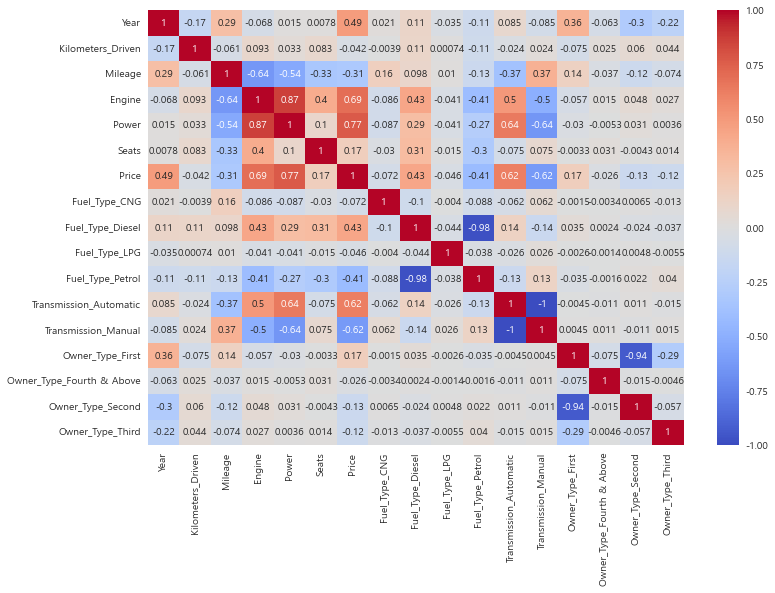

In [124]:
X = data.drop(['Price'], axis=1)
y = data['Price']


plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap='coolwarm', annot=True)

파워와 엔진이 높은 상관계수를 갖고있다.

In [99]:
# VIF check 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.sort_values(["VIF Factor"], ascending=[False])

,VIF Factor,features
6,inf,Fuel_Type_CNG
7,inf,Fuel_Type_Diesel
8,inf,Fuel_Type_LPG
9,inf,Fuel_Type_Petrol
10,inf,Transmission_Automatic
11,inf,Transmission_Manual
12,inf,Owner_Type_First
13,inf,Owner_Type_Fourth & Above
14,inf,Owner_Type_Second
15,inf,Owner_Type_Third


10이상의 제거해 줘야할 변수는 없어보인다 더미변수는 논외로 한다.

In [101]:
data.corr()['Price'].sort_values(ascending=False)

Price                        1.000000
Power                        0.769614
Engine                       0.688981
Transmission_Automatic       0.618451
Year                         0.486234
Fuel_Type_Diesel             0.431574
Owner_Type_First             0.170435
Seats                        0.167716
Owner_Type_Fourth & Above   -0.025580
Kilometers_Driven           -0.042014
Fuel_Type_LPG               -0.046319
Fuel_Type_CNG               -0.072112
Owner_Type_Third            -0.121836
Owner_Type_Second           -0.132227
Mileage                     -0.314463
Fuel_Type_Petrol            -0.414595
Transmission_Manual         -0.618451
Name: Price, dtype: float64

파워가 조금 높은 상관관계를 갖고있기는 하다

# Modeling

In [102]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import mean_squared_error

In [103]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [104]:
# 모델 불러옴
model = LinearRegression()

# train data에 fit시킴
model.fit(X_train, y_train)

LinearRegression()

In [105]:
# predict
pred = model.predict(X_train)

In [107]:
# fit된 모델의 R-square
model.score(X_train, y_train)

0.8702126993552795

In [108]:
mean_squared_error(y_train, pred)

0.09642346043871144

In [109]:
print(model.coef_) # 추정된 회귀계수 (intercept제외)
print(model.intercept_) # intercept

[ 1.25895812e-01 -4.38734710e-08 -2.05226481e-02  7.63442125e-05
  7.93986446e-03  1.59086498e-02  4.76557455e-03  2.08334561e-01
 -8.31020877e-02 -1.29998048e-01  1.62816906e-01 -1.62816906e-01
  2.59886109e-02  1.16165750e-01 -2.70087628e-02 -1.15145598e-01]
-252.3733878923431


In [110]:
# test data R-square
model.score(X_test, y_test)

0.8803592051642686

train 값과 test 값이 거의 비슷하며 상당히 높은 점수가 나타났다.
성능이 괜찮은 것같다.

# 회귀분석 가정검토

In [118]:
import scipy.stats
import statsmodels.api as sm

In [125]:
model = sm.OLS(y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     3081.
Date:                Sun, 06 Feb 2022   Prob (F-statistic):               0.00
Time:                        02:36:15   Log-Likelihood:                -1428.1
No. Observations:                5872   AIC:                             2884.
Df Residuals:                    5858   BIC:                             2978.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

p-value가 seats가 높게 나타나고 있다. Kilometers_Driven 역시 0.138로 높게 나온다.

In [141]:
# p-value 값이 큰  변수 제거해보기 
X2 = X.drop(["Seats","Kilometers_Driven"], axis=1) #뭘 넣고빼봐도 성능은 나빠짐


model = sm.OLS(y, X2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.497
Date:                Sun, 06 Feb 2022   Prob (F-statistic):              0.125
Time:                        02:43:29   Log-Likelihood:                -8323.8
No. Observations:                5872   AIC:                         1.667e+04
Df Residuals:                    5860   BIC:                         1.675e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

상당히 결과값이 나빠짐을 확인할 수 있다. p-value가 높더라도 넣는 것이 좋아보인다.

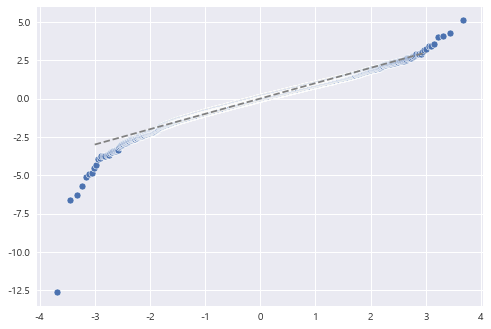

In [127]:
# 모델을 통해 얻은 예측값 
pred = result.predict()

# 잔차 = 실제값 - 예측값 
residual = data['Price'] - result.predict() 

sr = scipy.stats.zscore(residual)
(x, y), _ = scipy.stats.probplot(sr)

# 잔차의 정규성 
sns.scatterplot(x, y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

살작 어긋나 보인다.

<AxesSubplot:ylabel='Price'>

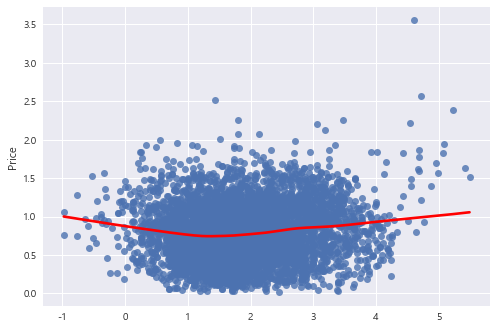

In [129]:
# 잔차의 등분산성 
sns.regplot(pred, np.sqrt(np.abs(sr)), lowess=True, line_kws={'color': 'red'})

이정도면 등분산성이 충분해보인다